In [1]:
import os
import s3fs

os.environ["AWS_ACCESS_KEY_ID"] = 'O7ZEAV5S27UG50BP9QCG'
os.environ["AWS_SECRET_ACCESS_KEY"] = '+ji4QltjZLOgffCEIRcF+DpVLcFupeJRIFvrrO6p'
os.environ["AWS_SESSION_TOKEN"] = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJPN1pFQVY1UzI3VUc1MEJQOVFDRyIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzQyMjAxOTM1LCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InN0dWFydC5iZW5vbGllbEBlbGV2ZS5lbnNhaS5mciIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJleHAiOjE3NDM3NzA1NTEsImZhbWlseV9uYW1lIjoiQmVub2xpZWwiLCJnaXZlbl9uYW1lIjoiU3R1YXJ0IiwiZ3JvdXBzIjpbIlVTRVJfT05ZWElBIl0sImlhdCI6MTc0MzE2NTc1MSwiaXNzIjoiaHR0cHM6Ly9hdXRoLmxhYi5zc3BjbG91ZC5mci9hdXRoL3JlYWxtcy9zc3BjbG91ZCIsImp0aSI6ImY5YTI5YzdjLWNlZGUtNDliOC04MjE0LWQ4ZDU4MjI5MjFiYyIsIm5hbWUiOiJTdHVhcnQgQmVub2xpZWwiLCJwb2xpY3kiOiJzdHNvbmx5IiwicHJlZmVycmVkX3VzZXJuYW1lIjoic3R1YXJ0YmVub2xpZWwiLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtc3NwY2xvdWQiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXByb2ZpbGUiXX19LCJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdLCJzY29wZSI6Im9wZW5pZCBwcm9maWxlIGdyb3VwcyBlbWFpbCIsInNpZCI6IjRmYTkwMmUyLWQ2ZjYtNDY0ZC1hMTQ1LTU0NDkwMmJhOWFkZiIsInN1YiI6ImE2ZDNhYmU4LThiN2EtNDVlMy1hNDdiLWMzYTQ3NTI5YjJjOSIsInR5cCI6IkJlYXJlciJ9.pE-gnXbNJcJf4-BS2JymH_t3y7QAqWObepem3GNKHebokzAfQeRTaa6CUoIuRDqZ1Dut_VfddRhNDFvkDyrHpQ'
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'

fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://' + 'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [2]:
fs.ls("stuartbenoliel/stage_3A")

['stuartbenoliel/stage_3A/.keep',
 'stuartbenoliel/stage_3A/households_974.gpkg',
 'stuartbenoliel/stage_3A/households_france.gpkg',
 'stuartbenoliel/stage_3A/population_974.gpkg',
 'stuartbenoliel/stage_3A/population_france.gpkg']

In [35]:
import pandas as pd
import geopandas as gpd

# Charger le fichier .gpkg

BUCKET = "stuartbenoliel"
FILE_KEY_S3 = "stage_3A/households_974.gpkg"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    df_test = gpd.read_file(file_in)

/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: File /vsimem/pyogrio_0e145afc30694ffe9c0ea6a9da8c5921 has GPKG application_id, but non conformant file extension
  return ogr_read(


In [36]:
df_test.head()

,ID,TILE_ID,SIZE,GRD_MENAGE,MONOPARENT,NB_ADULTS,NB_MINORS,ind_0_3,ind_4_5,ind_6_10,ind_11_17,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,NIVEAU_VIE,geometry
0,CRS2975RES200mN7634200E359400_1,CRS2975RES200mN7634200E359400,1,False,False,1,0,0,0,0,0,0,0,0,0,0,1,0,54932.817564,POINT (359562.69 7634383.96)
1,CRS2975RES200mN7634200E359400_2,CRS2975RES200mN7634200E359400,2,False,True,1,1,1,0,0,0,0,0,1,0,0,0,0,28749.063818,POINT (359584.49 7634368.54)
2,CRS2975RES200mN7634200E359400_3,CRS2975RES200mN7634200E359400,2,False,False,2,0,0,0,0,0,0,0,0,1,1,0,0,5692.183823,POINT (359562.69 7634383.96)
3,CRS2975RES200mN7634200E359400_4,CRS2975RES200mN7634200E359400,2,False,False,2,0,0,0,0,0,0,0,1,0,1,0,0,59414.173833,POINT (359543.68 7634388.23)
4,CRS2975RES200mN7634200E359400_5,CRS2975RES200mN7634200E359400,3,False,False,3,0,0,0,0,0,0,1,0,0,2,0,0,12637.147613,POINT (359584.49 7634368.54)


In [3]:
import pandas as pd
import geopandas as gpd

# Charger le fichier .gpkg

BUCKET = "stuartbenoliel"
FILE_KEY_S3 = "stage_3A/population_974.gpkg"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    df = gpd.read_file(file_in)

/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: File /vsimem/pyogrio_11f3aa53bfe74ffd96cadd140f5be200 has GPKG application_id, but non conformant file extension
  return ogr_read(


In [4]:
df.head()

,ID,HOUSEHOLD_ID,HOUSEHOLD_SIZE,GRD_MENAGE,MONOPARENT,NIVEAU_VIE,TILE_ID,AGE_CAT,AGE,ADULT,STATUT,geometry
0,CRS2975RES200mN7634200E359400_1_1,CRS2975RES200mN7634200E359400_1,1,False,False,54932.817564,CRS2975RES200mN7634200E359400,ind_80p,88,True,ADULT,POINT (359562.69 7634383.96)
1,CRS2975RES200mN7634200E359400_2_1,CRS2975RES200mN7634200E359400_2,2,False,True,28749.063818,CRS2975RES200mN7634200E359400,ind_0_3,1,False,MINOR,POINT (359584.49 7634368.54)
2,CRS2975RES200mN7634200E359400_2_2,CRS2975RES200mN7634200E359400_2,2,False,True,28749.063818,CRS2975RES200mN7634200E359400,ind_40_54,43,True,ADULT,POINT (359584.49 7634368.54)
3,CRS2975RES200mN7634200E359400_3_1,CRS2975RES200mN7634200E359400_3,2,False,False,5692.183823,CRS2975RES200mN7634200E359400,ind_55_64,63,True,ADULT,POINT (359562.69 7634383.96)
4,CRS2975RES200mN7634200E359400_3_2,CRS2975RES200mN7634200E359400_3,2,False,False,5692.183823,CRS2975RES200mN7634200E359400,ind_65_79,72,True,ADULT,POINT (359562.69 7634383.96)


<Axes: >

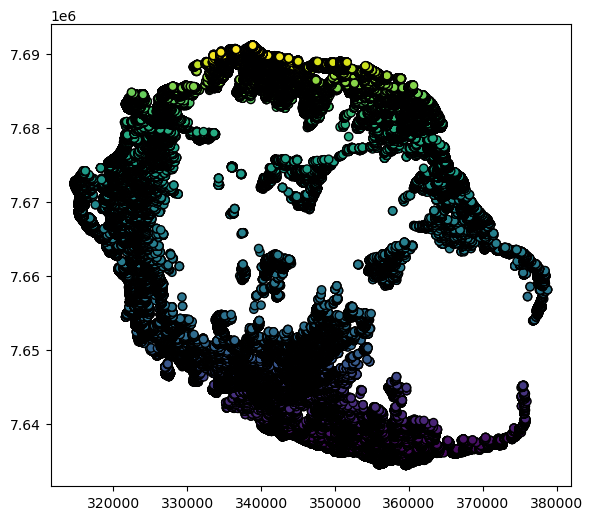

In [5]:
df.plot(figsize=(10, 6), edgecolor="black", cmap="viridis")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Création d'un DataFrame avec une colonne contenant 100 valeurs entre 0 et 100

if 'df' not in globals():
    df = pd.DataFrame({
        'NIVEAU_VIE': [randint(0, 100) for _ in range(10000)],
        'AGE': [randint(50, 150) for _ in range(10000)],
    })

var_1 = 'NIVEAU_VIE'
var_2 = 'AGE'


print("Le max est de :", df[var_1].max())
print("Le min est de :", df[var_1].min())

print("Le max est de :", df[var_1].max())
print("Le min est de :", df[var_1].min())

print("La moyenne est de :", df[var_1].mean())
print("La variance est de :", df[var_1].var(ddof=0))
print("L'écart type est de :", df[var_1].std(ddof=0))

print("La moyenne est de :", df[var_2].mean())
print("La variance est de :", df[var_2].var(ddof=0))
print("L'écart type est de :", df[var_2].std(ddof=0))

print("Corrélation linéaire :", df[var_1].corr(df[var_2]))

Le max est de : 311916.81267217855
Le min est de : 0.031076563416255892
Le max est de : 311916.81267217855
Le min est de : 0.031076563416255892
La moyenne est de : 19099.050051182385
La variance est de : 322664181.0269084
L'écart type est de : 17962.85559221886
La moyenne est de : 36.702045911980136
La variance est de : 542.8590392339648
L'écart type est de : 23.29933559640628
Corrélation linéaire : 0.14300145466808875


# 1. Generalized Sample and Aggregate
Design a variant of sample and aggregate which does not require the analyst to specify the output range of the query function
$f$.

In [7]:
from random import randint

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity*np.sqrt(2*np.log(1.25/delta))/epsilon)

# preserves epsilon-differential privacy
def above_threshold(queries, df, T, epsilon):
    T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)   
    for idx, q in enumerate(queries):
        nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
        if q(df) + nu_i >= T_hat:
            return idx
    # if the algorithm "fails", return a random index 
    # more convenient in certain use cases
    print("Fail")    
    return randint(0,len(queries)-1)

def auto_borne(df, f, epsilon, borne = "upper", b_test = 0):
    def create_query(b, borne = "upper", b_test = 0):
        if borne == "upper":
            return lambda df: 1000* (np.clip(df, b_test, b).mean() - np.clip(df, b_test, b+1).mean())
        elif borne == "lower":
            return lambda df: 1000* (np.clip(df, b+1, b_test).mean() - np.clip(df, b, b_test).mean())

    # Construct the stream of queries
    bs = range(1,150000,5)
    queries = [create_query(b, borne) for b in bs]
    final_b = bs[above_threshold(queries, df, 0, epsilon)]
    
    return final_b

def sample_and_aggregate(df, f, k, epsilon, u=None, l=None, logging=False):
    
    # Calculate the number of rows in each chunk
    chunk_size = int(np.ceil(df.shape[0] / k))
    
    if logging:
        print(f'Chunk size: {chunk_size}')
        
    # Step 1: split `df` into chunks
    xs = [df[i:i+chunk_size] for i in range(0, df.shape[0], chunk_size)]
    
    # Step 2: run f on each x_i and clip its output
    answers = [f(x_i) for x_i in xs]

    if u is None and l is None:
        u = auto_borne(answers, f, epsilon/3, borne = "upper", b_test = 0)
        l = auto_borne(answers, f, epsilon/3, borne = "lower", b_test = u)
        epsilon_mean = epsilon/3

    elif u is None:
        u = auto_borne(answers, f, epsilon/2, borne = "upper", b_test = l)
        epsilon_mean = epsilon/2

    elif l is None:
        l = auto_borne(answers, f, epsilon/2, borne = "lower", b_test = u)
        epsilon_mean = epsilon/2

    else:
        epsilon_mean = epsilon

    clipped_answers = np.clip(answers, l, u)
    # Step 3: take the noisy mean of the clipped answers
    noisy_mean = laplace_mech(np.mean(clipped_answers), (u-l)/k, epsilon_mean)
    return noisy_mean

sample_and_aggregate(df[var_1], f=lambda x: x.mean(), k = 600, epsilon = 1, l = 0, logging=True)

Chunk size: 1446


np.float64(19126.47043795175)

In [8]:
sample_and_aggregate(df[var_1], f=lambda x: x.var(), k = 100, epsilon = 1)

Fail


np.float64(5519.470069359889)

# 2. Summary Statistics

Design an algorithm to produce differentially private versions of the following statistics:

    Sum

    Mean

    Variance

    Standard deviation

    Ratio

    Correlation

    Quantiles


## Count

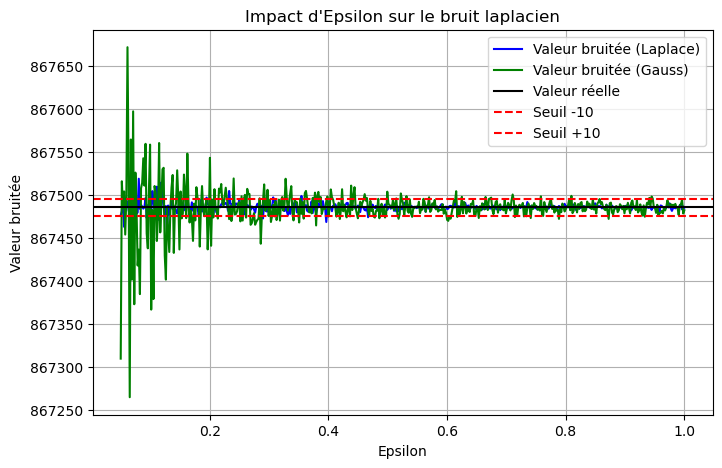

In [29]:
epsilon_values = np.linspace(0.05, 1, 500)  
noisy_values = [laplace_mech(len(df), 1, eps) for eps in epsilon_values]
noisy_values_gauss = [gaussian_mech(len(df), 1, eps, delta = 1e-5) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.plot(epsilon_values, noisy_values_gauss, label="Valeur bruitée (Gauss)", color='green')
plt.axhline(len(df), color='black', linestyle='-', label="Valeur réelle")
plt.axhline(len(df)-10, color='red', linestyle='--', label="Seuil -10")
plt.axhline(len(df)+10, color='red', linestyle='--', label="Seuil +10")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Sum

In [19]:
def auto_sum(df, epsilon, poids = 1/2):
    def create_query(b):
        return lambda df: df.clip(lower=0, upper=b).sum() - df.clip(lower=0, upper=b+1).sum()

    # Construct the stream of queries
    bs = range(100_000, 500_000, 1_000)
    queries = [create_query(b) for b in bs]

    epsilon_b = epsilon * poids
    epsilon_sum = epsilon * (1-poids)

    
    final_b = bs[above_threshold(queries, df, 0, epsilon_b)]

    # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
    noisy_sum = laplace_mech(df.clip(lower=0, upper=final_b).sum(), final_b, epsilon_sum)
    
    return noisy_sum


def NoisySum(df, L: float, U: float, epsilon: float, delta = None, distrib = "Laplace"):
    s = max(abs(L), abs(U))
    if distrib == "Laplace":
        return laplace_mech(df.clip(lower=L, upper=U).sum(),s, epsilon)
    elif distrib == "Gauss":# De#"r"
        return gaussian_mech(df.clip(lower=L, upper=U).sum(),s, epsilon, delta)
        

print(auto_sum(df[var_1], 1))
print(NoisySum(df[var_1], 0, 100, 1))
print(NoisySum(df[var_1], 0, 100, 0.9, 1e-5, distrib="Gauss"))
print(df[var_1].sum())

16568141768.767967
86612818.02005479
86613124.9749726
16568158532.7


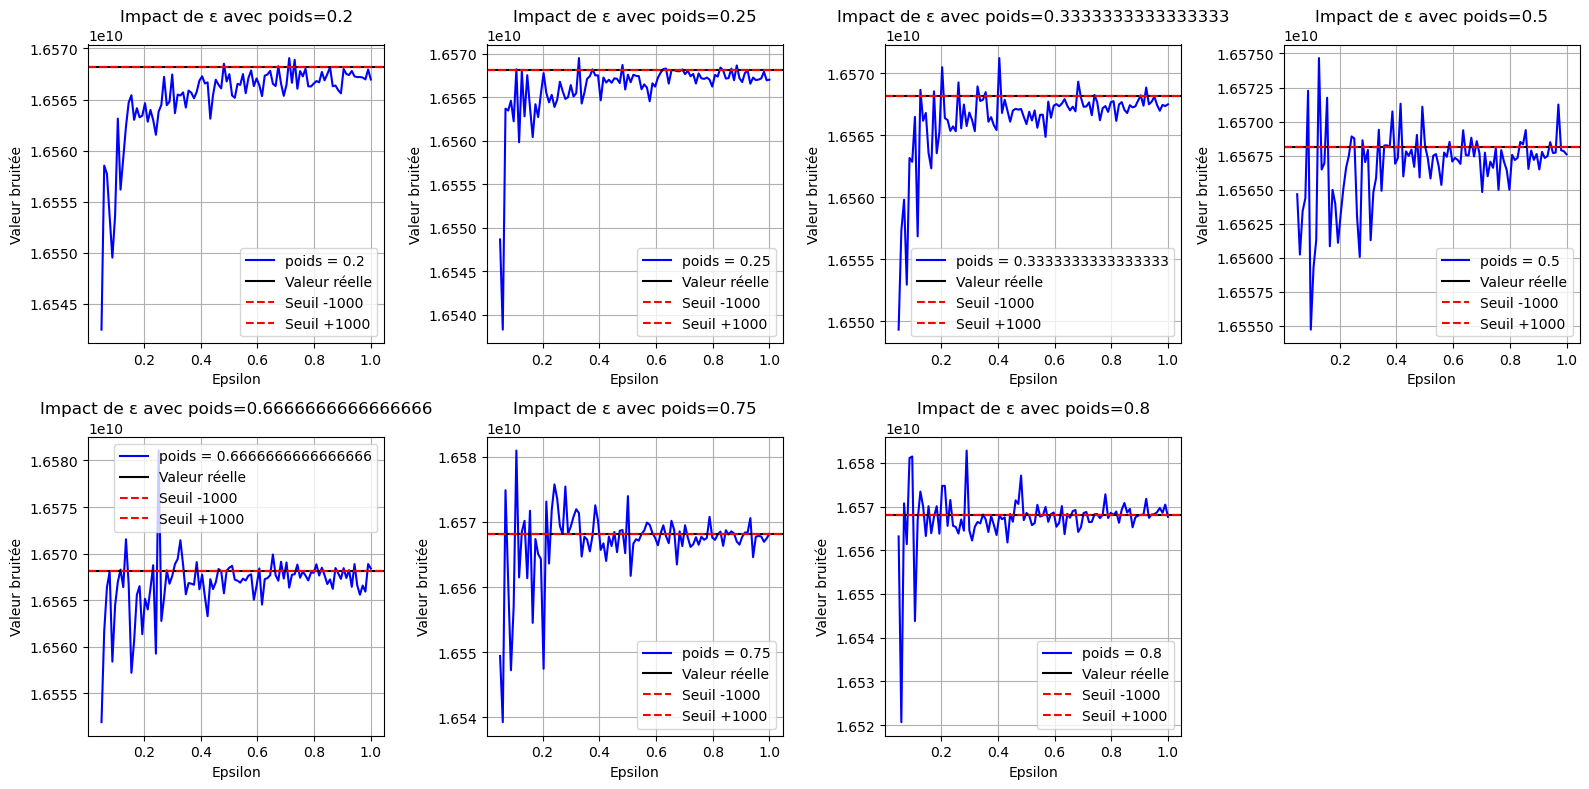

In [31]:
# Paramètres
epsilon_values = np.linspace(0.05, 1, 100)  # Éviter epsilon=0
poids_values = [1/5, 1/4, 1/3, 1/2, 2/3, 3/4, 4/5]  # Différentes valeurs de poids

# Création des subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  # 2 lignes, 4 colonnes
axes = axes.flatten()  # Facilité d'indexation

for i, poids in enumerate(poids_values):
    noisy_values = [auto_sum(df[var_1], eps, poids) for eps in epsilon_values]
    
    ax = axes[i]
    ax.plot(epsilon_values, noisy_values, label=f"poids = {poids}", color='blue')
    ax.axhline(df[var_1].sum(), color='black', linestyle='-', label="Valeur réelle")
    ax.axhline(df[var_1].sum() - 1000, color='red', linestyle='--', label="Seuil -1000")
    ax.axhline(df[var_1].sum() + 1000, color='red', linestyle='--', label="Seuil +1000")
    
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Valeur bruitée")
    ax.set_title(f"Impact de ε avec poids={poids}")
    ax.legend()
    ax.grid()

# Suppression du dernier subplot vide si le nombre de poids est impair
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

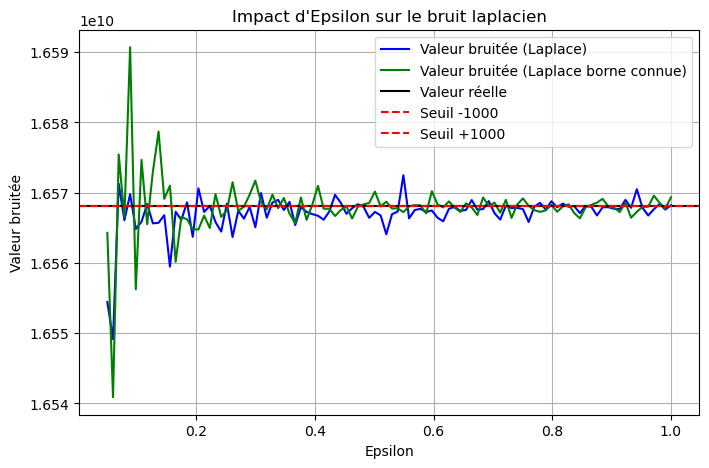

In [28]:
epsilon_values = np.linspace(0.05, 1, 100)  
noisy_values = [auto_sum(df[var_1], eps, poids= 1/2) for eps in epsilon_values]
noisy_values_2 = [NoisySum(df[var_1], 0, 500_000, eps) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.plot(epsilon_values, noisy_values_2, label="Valeur bruitée (Laplace borne connue)", color='green')
plt.axhline(df[var_1].sum(), color='black', linestyle='-', label="Valeur réelle")
plt.axhline(df[var_1].sum()-1000, color='red', linestyle='--', label="Seuil -1000")
plt.axhline(df[var_1].sum()+1000, color='red', linestyle='--', label="Seuil +1000")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Mean

In [24]:
def auto_avg(df, epsilon):

    # Compute the noisy sum and noisy count
    noisy_sum = auto_sum(df, 4*epsilon / 5)
    noisy_count = laplace_mech(len(df), 1, epsilon / 5)
    
    return noisy_sum/noisy_count

print(sample_and_aggregate(df[var_1],  lambda x: x.mean(), 600, 1, logging=False))
print(auto_avg(df[var_1], 1))

19028.81026436647
19098.58451561265


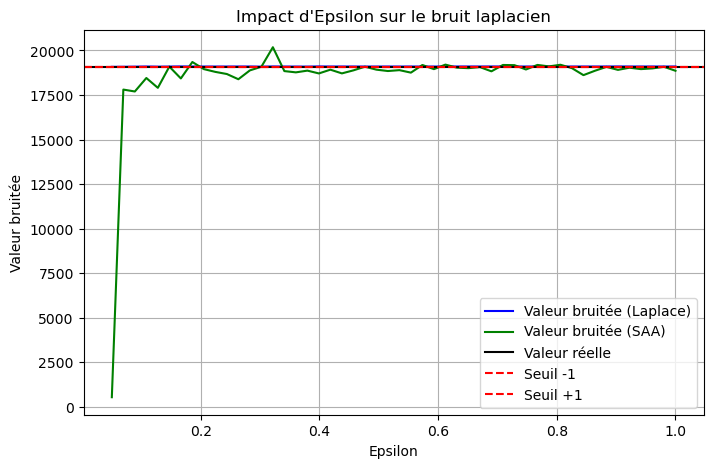

In [30]:
epsilon_values = np.linspace(0.05, 1, 50)  
noisy_values = [auto_avg(df[var_1], eps) for eps in epsilon_values]
# noisy_values_saa = [sample_and_aggregate(df[var_1], f=lambda x: x.mean(), k = 600, epsilon = eps, l = 0) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.plot(epsilon_values, noisy_values_saa, label="Valeur bruitée (SAA)", color='green')
plt.axhline(df[var_1].mean(), color='black', linestyle='-', label="Valeur réelle")
plt.axhline(df[var_1].mean()-1, color='red', linestyle='--', label="Seuil -1")
plt.axhline(df[var_1].mean()+1, color='red', linestyle='--', label="Seuil +1")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Variance

In [33]:
def auto_var(df, epsilon):
    def create_query(b):
        mean_val = df.mean()
        # Transformation (x - mean)^2
        df_transfo = (df - mean_val) ** 2

        return lambda df: df_transfo.clip(lower=0, upper=b).sum() - df_transfo.clip(lower=0, upper=b+1).sum()

    # Construct the stream of queries
    bs = range(100_000, 500_000, 1_000)
    queries = [create_query(b) for b in bs]
    
    # Run AboveThreshold, using 1/3 of the privacy budget, to find a good clipping parameter
    final_b = bs[above_threshold(queries, df, 0, epsilon / 10)]

    mean_val = df.mean()
    # Transformation (x - mean)^2
    df_transfo = (df - mean_val) ** 2

    # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
    noisy_sum = laplace_mech(df_transfo.clip(lower=0, upper=final_b).sum(), final_b**2, 8*epsilon / 10)
    noisy_count = laplace_mech(len(df), 1, epsilon / 10)
    
    return noisy_sum / noisy_count

print(auto_var(df[var_1], 1000))

Fail
301941.5465562455


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


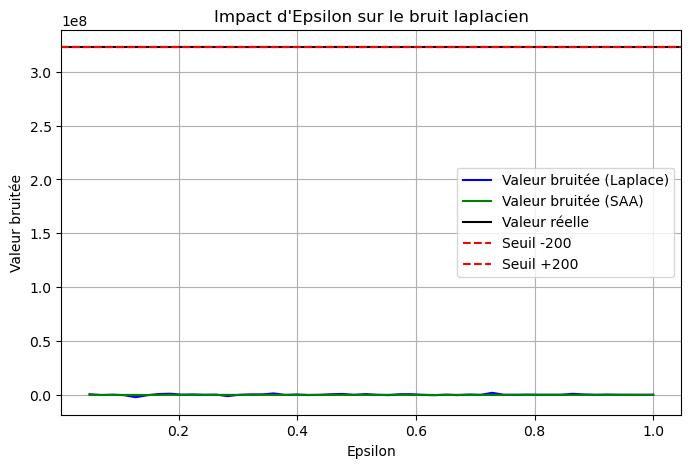

In [34]:
epsilon_values = np.linspace(0.05, 1, 50)  
noisy_values = [auto_var(df[var_1], eps) for eps in epsilon_values]
noisy_values_saa = [sample_and_aggregate(df[var_1], f=lambda x: x.var(), k = 20, epsilon = eps, l = 0) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.plot(epsilon_values, noisy_values_saa, label="Valeur bruitée (SAA)", color='green')
plt.axhline(df[var_1].var(), color='black', linestyle='-', label="Valeur réelle")
plt.axhline(df[var_1].var()-200, color='red', linestyle='--', label="Seuil -200")
plt.axhline(df[var_1].var()+200, color='red', linestyle='--', label="Seuil +200")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Standard deviation

In [ ]:
def auto_std(df, epsilon):
    return auto_var(df,epsilon)**(1/2)

print(auto_std(df[var_1], 1))

18.35701292767423


## Ratio

In [ ]:
def auto_ratio(df_1, df_2, epsilon):

    # Compute the 2 noisy sums
    noisy_sum_1 = auto_sum(df_1, epsilon / 2)
    noisy_sum_2 = auto_sum(df_2, epsilon / 2)
    
    return noisy_sum_1 / noisy_sum_2

print(auto_ratio(df[var_1], df[var_2], 1))

0.4962247641829044


/tmp/ipykernel_101907/1004263880.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)
/tmp/ipykernel_101907/1004263880.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
/tmp/ipykernel_101907/1004263880.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
/tmp/ipykernel_101907/1004263880.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)
/tmp/ipykernel_101907/1004263880.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
/tmp/ipykernel_101907/1004263880.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
/tmp/ipykernel_101907/3299904202.py:7: RuntimeWarning:

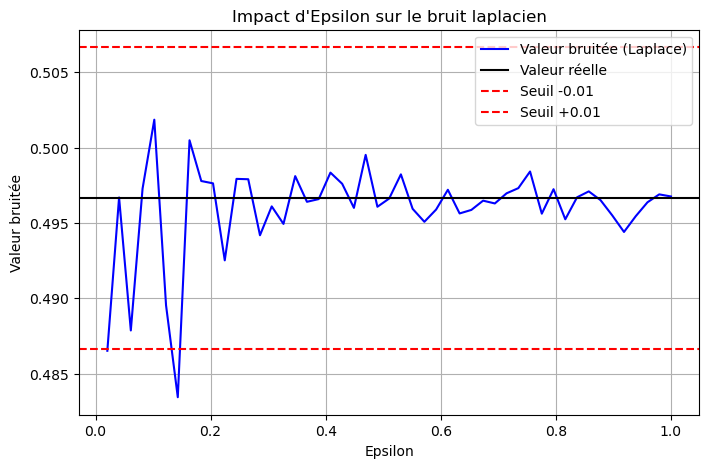

In [ ]:
epsilon_values = np.linspace(0, 1, 50)  
noisy_values = [auto_ratio(df[var_1], df[var_2], eps) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.axhline((df['val_1'].sum()/ df[var_2].sum()), color='black', linestyle='-', label="Valeur réelle")
plt.axhline((df['val_1'].sum() / df[var_2].sum()) -0.01, color='red', linestyle='--', label="Seuil -0.01")
plt.axhline((df['val_1'].sum()/ df[var_2].sum()) +0.01, color='red', linestyle='--', label="Seuil +0.01")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Correlation

In [ ]:
def auto_corr(df_1, df_2, epsilon):

    # Compute the 2 noisy sums
    noisy_mean_1_2 = auto_avg(df_1 * df_2, epsilon / 11)
    noisy_mean_1 = auto_avg(df_1, epsilon / 11)
    noisy_mean_2 = auto_avg(df_2, epsilon / 11)

    noisy_std_1 = auto_std(df_1, 4*epsilon/11)
    noisy_std_2 = auto_std(df_2, 4*epsilon/11)
    
    return (noisy_mean_1_2 - noisy_mean_1 * noisy_mean_2) / (noisy_std_1 * noisy_std_2)


print(auto_corr(df[var_1], df[var_2], 10))

-0.00639141286880942


## Quantile